# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import os
os.getcwd()

'/content'

In [3]:
os.chdir("/content/drive/My Drive/ClassNotes/Lab9-Seq models in NLP")
os.getcwd()

'/content/drive/My Drive/ClassNotes/Lab9-Seq models in NLP'

In [4]:

df = pd.read_csv('daily-minimum-temperatures-in-me.csv')



### Print the data
- First 5 rows only

In [5]:
print(df.head())

         Date  Temperature
0  1981-01-01         20.7
1  1981-01-02         17.9
2  1981-01-03         18.8
3  1981-01-04         14.6
4  1981-01-05         15.8


### Set index column
- Set the DataFrame index using "Date" column

In [6]:
df=df.set_index('Date')

In [7]:
df.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## Question 2

### Check the total count of null values in the data

In [8]:
print(df.isnull().any(axis=1).sum())

0


### Drop all the rows with null values
- use dropna() method

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Temperature    0
dtype: int64

## Question 3

### Describe your dataframe
- use describe() method

In [11]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

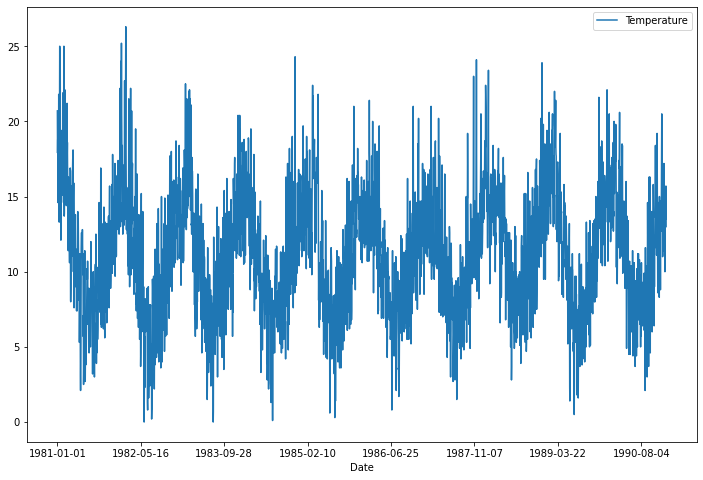

In [12]:
df.plot(figsize=(12,8))

### Get representation of the distribution of data using histogram
- use hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd6b3433c8>]],
      dtype=object)

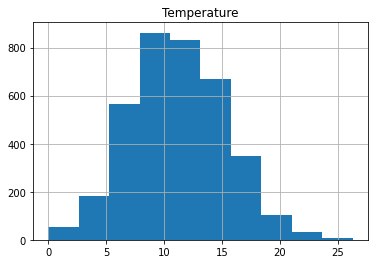

In [13]:
df.hist(bins=10)

### Check minimum and maximum temperature
- use min() and max() methods

In [14]:
print("Max:",df.max()) , print("Min :",df.min())

Max: Temperature    26.3
dtype: float64
Min : Temperature    0.0
dtype: float64


(None, None)

## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [15]:
train = df[:int(len(df) * 0.75)]
test = df[int(len(df) * 0.75):len(df)]

print('train: {}\ntest: {}'.format(len(train), len(test)))


train: 2737
test: 913


### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

### Print scaled train and test data
- print only first 5 values

In [17]:
train_scaled[0:5]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046]])

In [18]:
test_scaled[0:5]

array([[0.22813688],
       [0.22053232],
       [0.18631179],
       [0.19011407],
       [0.31939163]])

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [19]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [20]:
look_back = 1
X_train, y_train = create_seq_data(train_scaled, look_back)
X_test, y_test = create_seq_data(test_scaled, look_back)

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


### Print shape of data
- print shape of X_train and X_test

In [22]:
print(X_train.shape)
print(X_test.shape)

(2736, 1, 1)
(912, 1, 1)


## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [23]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf

batch_size = 1
model = Sequential()
model.add(LSTM(10, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))


## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [24]:
model.compile(loss='mean_squared_error', optimizer='adam')


### summarize your model
- use summary() method

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 10)                   480       
_________________________________________________________________
dense (Dense)                (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [26]:
model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/50
2736/2736 - 3s - loss: 0.0160
Epoch 2/50
2736/2736 - 3s - loss: 0.0102
Epoch 3/50
2736/2736 - 3s - loss: 0.0102
Epoch 4/50
2736/2736 - 3s - loss: 0.0101
Epoch 5/50
2736/2736 - 3s - loss: 0.0101
Epoch 6/50
2736/2736 - 3s - loss: 0.0101
Epoch 7/50
2736/2736 - 3s - loss: 0.0101
Epoch 8/50
2736/2736 - 3s - loss: 0.0100
Epoch 9/50
2736/2736 - 3s - loss: 0.0100
Epoch 10/50
2736/2736 - 3s - loss: 0.0101
Epoch 11/50
2736/2736 - 3s - loss: 0.0100
Epoch 12/50
2736/2736 - 3s - loss: 0.0100
Epoch 13/50
2736/2736 - 3s - loss: 0.0101
Epoch 14/50
2736/2736 - 4s - loss: 0.0101
Epoch 15/50
2736/2736 - 4s - loss: 0.0100
Epoch 16/50
2736/2736 - 4s - loss: 0.0100
Epoch 17/50
2736/2736 - 3s - loss: 0.0100
Epoch 18/50
2736/2736 - 3s - loss: 0.0101
Epoch 19/50
2736/2736 - 3s - loss: 0.0100
Epoch 20/50
2736/2736 - 3s - loss: 0.0100
Epoch 21/50
2736/2736 - 3s - loss: 0.0100
Epoch 22/50
2736/2736 - 3s - loss: 0.0100
Epoch 23/50
2736/2736 - 3s - loss: 0.0100
Epoch 24/50
2736/2736 - 3s - loss: 0.0101
E

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [27]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)


### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [28]:
model.reset_states()



### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [29]:
testPredict = model.predict(X_test, batch_size=batch_size)


## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [30]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])


### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [31]:
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])


### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [32]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))


Train Score: 2.60 RMSE


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [33]:
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 2.52 RMSE
